In [1]:
#review_format:Cleaned and normalized user's notice
#review_len:Number of characters in the notice
#review_nb_words:Number of words in the notice

### Intrduction to Data

In [2]:
import pandas as pd 
df = pd.read_csv('facebook_reviews_disneylandParis_format 2.csv')
df.head(5)
df.keys()

Index(['user_id', 'review', 'stars', 'date_format', 'time_of_day',
       'hour_of_day', 'day_of_week', 'review_format', 'review_lang',
       'month_year', 'review_len', 'review_nb_words'],
      dtype='object')

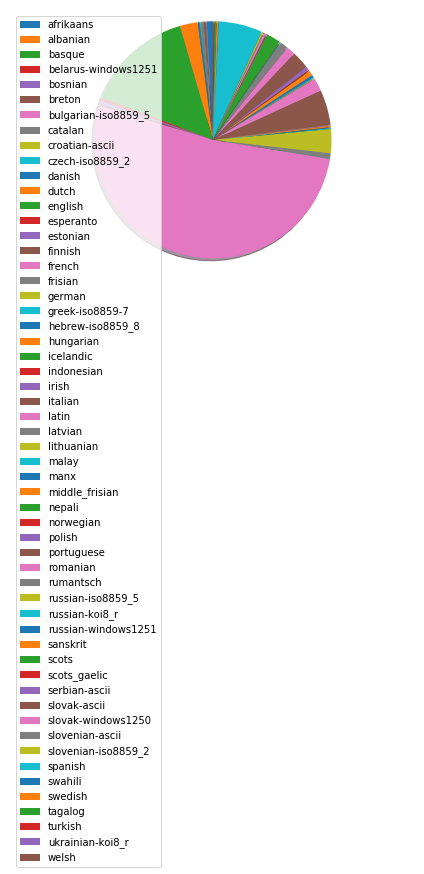

In [3]:
Langgroup = df.groupby(['review_lang']).size() 

import matplotlib.pyplot as plt
 
labels = Langgroup.index
sizes = Langgroup.values 
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
patches, texts = plt.pie(sizes, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

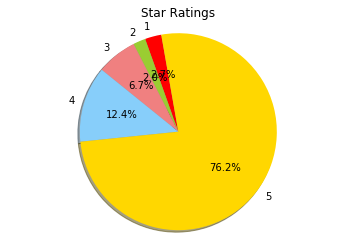

In [4]:
import matplotlib.pyplot as plt

reviewstars = df.groupby(['stars']).size()
# Data to plot
labels = reviewstars.index
sizes =  reviewstars.values
colors = ['red', 'yellowgreen', 'lightcoral', 'lightskyblue','gold']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
#plt.pie(sizes, labels=labels,

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle= 100)
plt.title('Star Ratings') 
plt.axis('equal')
plt.show()

In [5]:
import pandas as pd 
data = pd.read_csv('/Users/safalmehta/Desktop/new_paris.csv')
print(data.head(5))

                            user_id  \
0  80c000023271dbfc5cce8a1cb0c19c0a   
1  497cceaf8e1d61bd7659cfe70e61e29e   
2  9a129dc48577a30bab11d979339271fd   
3  3dba781494fdde8ff0ffafc523a081f2   
4  18a3fe7f46defd25c951f75cf0766a58   

                                              review  stars    date_format  \
0  Just amazing!! There's no place in the world m...      5  9/27/17 21:36   
1  Unpleasant experience, not friendly, smoke eve...      1  9/27/17 21:32   
2                                10 hours of smiling      5  9/26/17 22:21   
3  Food --&gt; so bad<br/> Language quality --&gt...      5  9/22/17 20:17   
4  Disney Studio Park made up for EVERYTHING, wit...      3  9/19/17 21:15   

  time_of_day  hour_of_day day_of_week  \
0       21:36           21         Mer   
1       21:32           21         Mer   
2       22:21           22         Mar   
3       20:17           20         Ven   
4       21:15           21         Mar   

                                       revi

In [6]:
data = data[['review_lang','stars','review_format','review_len','review_nb_words']]
print(data.head())




  review_lang  stars                                      review_format  \
0     english      5  just amazing   there s no place in the world m...   
1     english      1  unpleasant experience  not friendly  smoke eve...   
2     english      5                                   hours of smiling   
3     english      5  food    gt  so bad language quality    gt  ver...   
4     english      3  disney studio park made up for everything  wit...   

   review_len  review_nb_words  
0          75               13  
1          53                6  
2          17                3  
3         143               27  
4         307               56  


In [7]:
##Taking only english language from review_lang
english =  data['review_lang']=='english'
eng = data[english]
print(eng)


     review_lang  stars                                      review_format  \
0        english      5  just amazing   there s no place in the world m...   
1        english      1  unpleasant experience  not friendly  smoke eve...   
2        english      5                                   hours of smiling   
3        english      5  food    gt  so bad language quality    gt  ver...   
4        english      3  disney studio park made up for everything  wit...   
5        english      5  it was great experience and happy day  i stron...   
6        english      5                                             top      
7        english      5               the dream that becomes reality   lt    
8        english      1                      disney handicap    le malaise   
9        english      5                    the best place in the world       
10       english      1  i bought the expensive ticket and unfortunatel...   
11       english      5  this is my rd day  loving it  this plac

In [8]:
##divide the the reviews to positive and negative based on star ratings

positive=eng[eng['stars']>=3]
#print(positive['review_format'][0])
negative=eng[eng['stars']<=2]
#print(negative['review_format'][0])

In [9]:
#number of columns 
count_of_columns = data.count()
count_of_columns

review_lang        2394
stars              2394
review_format      2394
review_len         2394
review_nb_words    2394
dtype: int64

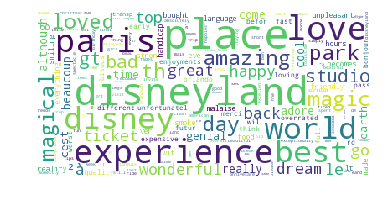

In [10]:
###Word cloud for all the reviews in review_format


import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS


mpl.rcParams['font.size']=12                
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)
data = pd.read_csv('/Users/safalmehta/Desktop/new_paris.csv')

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(data['review_format']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

#data.head()

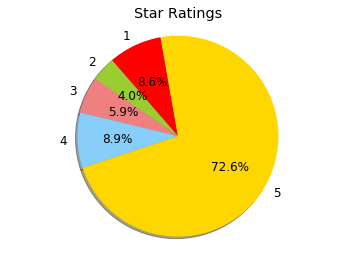

In [11]:
##star ratings based on english language
import matplotlib.pyplot as plt

reviewstars = data.groupby(['stars']).size()
# Data to plot
labels = reviewstars.index
sizes =  reviewstars.values
colors = ['red', 'yellowgreen', 'lightcoral', 'lightskyblue','gold']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
#plt.pie(sizes, labels=labels,

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle= 100)
plt.title('Star Ratings') 
plt.axis('equal')
plt.show()

In [12]:
from datetime import datetime
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as pyplot
df1 = data[['date_format','stars']]
#df = pd.DataFrame(data, columns = ['date_format', 'stars'])
#print(df1)

In [13]:
df1['date_format'] = pd.to_datetime(df1['date_format'],dayfirst=True, infer_datetime_format=True)

/Users/safalmehta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
df1.index = df1['date_format']
del df1['date_format']
#df1

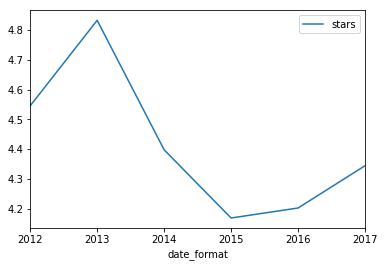

In [15]:
df1.resample('A').mean().plot()

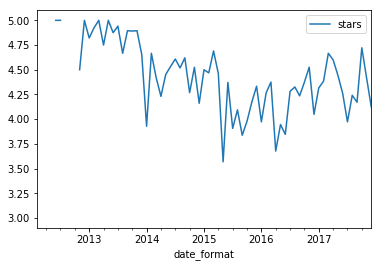

In [16]:
df1.resample('M').mean().plot()

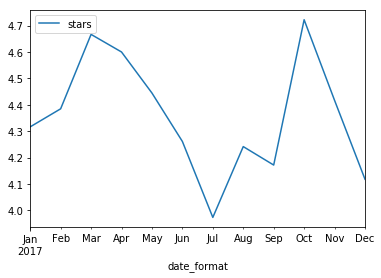

In [17]:
df1['2017'].resample('M').mean().plot()

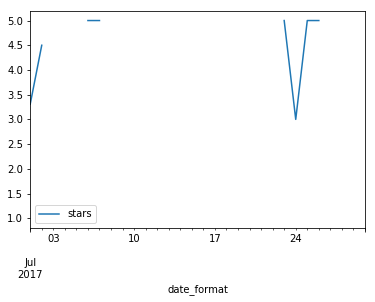

In [18]:
df1['2017-07'].resample('D').mean().plot()

### Sentiment Analysis

In [19]:
#sentiment analysis
from textblob import TextBlob
pos_count=0
pos_correct=0
for row in positive['review_format']:
    b = TextBlob(row)
    
    if b.sentiment.polarity>0:
        pos_correct+=1      
    pos_count+=1
print(pos_correct)
print(pos_count)
print((pos_correct/pos_count)*100) #accuracy of positive sentiment

#87% of the positive reviews are correctly classified as positive.

1836
2093
87.72097467749643


In [20]:
neg_count=0
neg_correct=0
for row in negative['review_format']:
    b = TextBlob(row)
    if b.sentiment.polarity<=0:
        neg_correct+=1
    neg_count+=1
print(neg_correct)
print(neg_count)
print((neg_correct/neg_count)*100) #accuracy of negative sentiment.

182
301
60.46511627906976


In [21]:
from textblob import TextBlob
pos_count=0
pos_correct=0
for row in positive['review_format']:
    b = TextBlob(row)
    if b.sentiment.subjectivity>0.8:
        if b.sentiment.polarity>0:
            pos_correct+=1
        pos_count+=1
print(pos_correct)
print(pos_count)
print((pos_correct/pos_count)*100) #accuracy of objective reviews
#objective reviews in which % of correct prediction in obejctive reviews.


293
305
96.06557377049181


In [22]:
neg_count=0
neg_correct=0
for row in negative['review_format']:
    b = TextBlob(row)
    if b.sentiment.subjectivity<0.8:
        if b.sentiment.polarity<=0:
            neg_correct+=1
        neg_count+=1
print(neg_correct)
print(neg_count)
print((neg_correct/neg_count)*100) #accuracy of obejective reviews.

172
291
59.106529209621996


### Text Classification

In [23]:
#text classification.


import nltk
import random

review_doc=[]
for review in positive['review_format']:
    
    doc = ( [num.strip() for num in review.split(' ') if num != ''], 'positive')
    review_doc.append(doc)
    
for review in negative['review_format']:
    doc = ( [num.strip() for num in review.split(' ') if num != ''], 'negative')
    review_doc.append(doc)

    
random.shuffle(review_doc) 

# list of all word in the reviews
all_words=[]
for w in review_doc:
     all_words.extend(w[0])
    
    
#check the most frequent words in all reviews
all_words_freq=nltk.FreqDist(all_words)

most_freq_words=list(all_words_freq.keys())[:3000] #the most frequent word list


def document_features(doc):
    words=set(doc)
    features={} 
    for w in most_freq_words:
        features[w] = (w in words) 
    return features

# now create the feature set
featureset=[(document_features(d),c) for (d,c) in review_doc]

#len(review_doc) #2394
#training and accuracy calculation
training_set=featureset[:1900] 
testing_set=featureset[1900:]
classifier=nltk.NaiveBayesClassifier.train(training_set)
print(nltk.classify.accuracy(classifier,testing_set)) 
classifier.show_most_informative_features(15) 

0.8522267206477733
Most Informative Features
                   email = True           negati : positi =     52.3 : 1.0
                response = True           negati : positi =     38.7 : 1.0
                   broke = True           negati : positi =     25.9 : 1.0
                supposed = True           negati : positi =     25.0 : 1.0
               cancelled = True           negati : positi =     25.0 : 1.0
                received = True           negati : positi =     23.2 : 1.0
                training = True           negati : positi =     20.5 : 1.0
                   means = True           negati : positi =     20.5 : 1.0
               appalling = True           negati : positi =     20.5 : 1.0
                  refuse = True           negati : positi =     20.5 : 1.0
                 seconds = True           negati : positi =     20.5 : 1.0
                  letter = True           negati : positi =     20.5 : 1.0
                 shouldn = True           negati : posi

In [24]:
# the error analysis
error=[]
for (name, tag) in testing_set:
    prediction = classifier.classify(document_features(name))
    if prediction!= tag:
        error.append((tag, prediction, name))
#print(error[0])
print(nltk.classify.accuracy(classifier,testing_set))

0.8522267206477733


### Topic Modelling

In [25]:
# topic modeling

import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop.extend(['n\'t','...', 'disney','br/','disneyland', 'pari','see','place','back','even','like','get','day','/span','would','park', 'one','told','http','disappoint','know','thi','could','veri','children','kid','daughter','realli','img','span'])

from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
import string
def clean(doc):
    tokenized=nltk.word_tokenize(doc) # step 1: tokenize
    lowercase=[i.lower() for i in tokenized] # step 2: convert to lower case
    stop_free=[i for i in lowercase if i not in stop] # step 3: get rid of stop words
    punc_free=[i for i in stop_free if not i in string.punctuation] # step 4: get rid of the punctuations
    normalized=[stemmer.stem(i) for i in punc_free] # step 5: stem the each words
    return normalized


clean_positive_corpus = [clean(i) for i in positive['review_format']] # step 6: format the corpus as a list of a list
clean_negative_corpus = [clean(i) for i in negative['review_format']]
#print(corpus_clean)

# Creating the term dictionary of our courpus, where every unique term is assigned an index.

from gensim import corpora
def topic_modelling(clean_corpus, num_topics, num_words):
    
    
    dictionary = corpora.Dictionary(clean_corpus) # this is all words. All the words appearing in all the documents
    #print(dictionary)

    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_corpus] # convert to a bag of words.
    #print(doc_term_matrix)

    # Creating the object for LDA model using gensim library
    import gensim
    Lda = gensim.models.ldamodel.LdaModel

    # Running and Training LDA model on the document term matrix.
    ldamodel = Lda(doc_term_matrix, num_topics=num_topics, id2word = dictionary )

    # # print most significant topics, and the most important words
    print(ldamodel.print_topics(num_topics=num_topics, num_words=num_words))


    # get topic distribution (this is the most important output in this application)
    #print(ldamodel.get_document_topics(doc_term_matrix[1]))


### Positive Reviews

In [26]:
topic_modelling(clean_positive_corpus, 10, 7)

[(0, '0.025*"amaz" + 0.021*"go" + 0.016*"nice" + 0.015*"love" + 0.014*"lt" + 0.014*"pari" + 0.012*"need"'), (1, '0.058*"love" + 0.038*"cool" + 0.024*"time" + 0.017*"go" + 0.017*"land" + 0.016*"great" + 0.013*"year"'), (2, '0.074*"love" + 0.035*"come" + 0.027*"time" + 0.025*"dream" + 0.024*"magic" + 0.019*"year" + 0.018*"true"'), (3, '0.046*"andateci" + 0.026*"trop" + 0.019*"lt" + 0.019*"earth" + 0.016*"cest" + 0.016*"tre" + 0.015*"cure"'), (4, '0.017*"beau" + 0.016*"time" + 0.015*"park" + 0.014*"magic" + 0.014*"go" + 0.011*"love" + 0.010*"year"'), (5, '0.056*"c" + 0.048*"pari" + 0.046*"est" + 0.020*"bien" + 0.016*"trop" + 0.012*"th" + 0.011*"super"'), (6, '0.036*"j" + 0.028*"ador" + 0.018*"pari" + 0.017*"chez" + 0.016*"donat" + 0.016*"diseas" + 0.015*"trip"'), (7, '0.054*"love" + 0.025*"best" + 0.024*"ride" + 0.023*"amaz" + 0.019*"much" + 0.014*"ever" + 0.014*"beauti"'), (8, '0.021*"best" + 0.020*"world" + 0.017*"ï¸\x8f" + 0.016*"nice" + 0.015*"awesom" + 0.014*"cool" + 0.014*"scari"'),

In [27]:
topic_modelling(clean_positive_corpus, 7, 3)

[(0, '0.030*"love" + 0.021*"great" + 0.021*"time"'), (1, '0.032*"andateci" + 0.019*"genial" + 0.018*"voic"'), (2, '0.071*"love" + 0.034*"j" + 0.032*"come"'), (3, '0.024*"time" + 0.016*"cool" + 0.016*"aim"'), (4, '0.026*"go" + 0.024*"trop" + 0.018*"amaz"'), (5, '0.027*"pari" + 0.027*"go" + 0.018*"love"'), (6, '0.046*"love" + 0.030*"magic" + 0.021*"time"')]


In [28]:
topic_modelling(clean_positive_corpus, 10, 5)

[(0, '0.089*"love" + 0.028*"j" + 0.027*"ador" + 0.022*"great" + 0.021*"pari"'), (1, '0.041*"est" + 0.040*"c" + 0.033*"lt" + 0.031*"bien" + 0.023*"pari"'), (2, '0.068*"love" + 0.025*"time" + 0.018*"magic" + 0.015*"amaz" + 0.014*"much"'), (3, '0.021*"awesom" + 0.014*"nice" + 0.014*"dream" + 0.012*"land" + 0.011*"ride"'), (4, '0.017*"perfect" + 0.017*"th" + 0.016*"hour" + 0.014*"enfanc" + 0.014*"retomb"'), (5, '0.049*"come" + 0.036*"magic" + 0.030*"dream" + 0.028*"true" + 0.020*"go"'), (6, '0.034*"pari" + 0.029*"love" + 0.026*"go" + 0.019*"fun" + 0.010*"soon"'), (7, '0.030*"amaz" + 0.026*"time" + 0.023*"year" + 0.022*"go" + 0.021*"best"'), (8, '0.045*"andateci" + 0.033*"land" + 0.024*"trop" + 0.023*"c" + 0.018*"voic"'), (9, '0.021*"magic" + 0.019*"time" + 0.014*"pari" + 0.013*"cool" + 0.013*"amaz"')]


In [29]:
topic_modelling(clean_positive_corpus, 10, 10)

[(0, '0.052*"andateci" + 0.022*"pari" + 0.014*"land" + 0.013*"th" + 0.012*"pleas" + 0.012*"voic" + 0.012*"jeffrey" + 0.012*"cure" + 0.011*"retomb" + 0.011*"enfanc"'), (1, '0.034*"love" + 0.034*"magic" + 0.027*"time" + 0.017*"wait" + 0.015*"pari" + 0.013*"fun" + 0.012*"beau" + 0.010*"come" + 0.009*"go" + 0.009*"happi"'), (2, '0.044*"love" + 0.026*"c" + 0.023*"go" + 0.019*"pari" + 0.018*"come" + 0.016*"time" + 0.015*"year" + 0.015*"cool" + 0.014*"land" + 0.013*"est"'), (3, '0.032*"time" + 0.025*"amaz" + 0.019*"genial" + 0.014*"pari" + 0.012*"love" + 0.012*"staff" + 0.010*"year" + 0.008*"come" + 0.007*"everi" + 0.007*"magic"'), (4, '0.027*"est" + 0.027*"c" + 0.019*"lt" + 0.012*"trip" + 0.011*"x" + 0.011*"everi" + 0.010*"nice" + 0.010*"super" + 0.010*"ride" + 0.010*"top"'), (5, '0.035*"come" + 0.031*"magic" + 0.029*"dream" + 0.024*"true" + 0.016*"everywher" + 0.013*"new" + 0.011*"great" + 0.011*"park" + 0.011*"need" + 0.010*"day"'), (6, '0.031*"best" + 0.019*"love" + 0.019*"amaz" + 0.018*"

### Negative Reviews

In [30]:
topic_modelling(clean_negative_corpus, 10, 7)

[(0, '0.011*"hour" + 0.010*"money" + 0.010*"staff" + 0.010*"time" + 0.008*"book" + 0.007*"ride" + 0.007*"wait"'), (1, '0.010*"go" + 0.010*"time" + 0.009*"us" + 0.008*"ride" + 0.008*"book" + 0.007*"ticket" + 0.007*"wait"'), (2, '0.016*"ride" + 0.013*"time" + 0.009*"year" + 0.008*"close" + 0.008*"kid" + 0.008*"queue" + 0.008*"hotel"'), (3, '0.027*"ride" + 0.011*"close" + 0.009*"pari" + 0.009*"hour" + 0.009*"time" + 0.008*"disappoint" + 0.007*"staff"'), (4, '0.016*"go" + 0.010*"staff" + 0.009*"time" + 0.009*"charact" + 0.008*"disappoint" + 0.008*"queue" + 0.008*"hour"'), (5, '0.014*"servic" + 0.010*"email" + 0.009*"still" + 0.008*"ticket" + 0.008*"hotel" + 0.007*"trip" + 0.007*"absolut"'), (6, '0.011*"staff" + 0.010*"time" + 0.010*"ride" + 0.009*"go" + 0.009*"peopl" + 0.008*"pari" + 0.008*"disappoint"'), (7, '0.015*"ride" + 0.013*"hour" + 0.010*"go" + 0.007*"meet" + 0.007*"staff" + 0.007*"time" + 0.007*"wait"'), (8, '0.010*"pari" + 0.007*"»" + 0.006*"pay" + 0.006*"peopl" + 0.006*"time" + 

In [31]:
topic_modelling(clean_negative_corpus, 5, 3)

[(0, '0.014*"ride" + 0.011*"time" + 0.009*"close"'), (1, '0.012*"smoke" + 0.010*"go" + 0.008*"ride"'), (2, '0.008*"us" + 0.007*"»" + 0.007*"staff"'), (3, '0.014*"ride" + 0.010*"time" + 0.008*"disappoint"'), (4, '0.010*"time" + 0.010*"hour" + 0.010*"go"')]


In [32]:
topic_modelling(clean_negative_corpus, 10, 10)

[(0, '0.019*"ride" + 0.011*"go" + 0.011*"wait" + 0.010*"money" + 0.010*"queue" + 0.009*"hour" + 0.008*"us" + 0.007*"ticket" + 0.007*"staff" + 0.007*"time"'), (1, '0.018*"time" + 0.008*"ride" + 0.008*"close" + 0.008*"hotel" + 0.007*"queue" + 0.007*"disappoint" + 0.007*"staff" + 0.006*"smoke" + 0.006*"peopl" + 0.006*"wait"'), (2, '0.021*"ride" + 0.014*"hour" + 0.010*"pari" + 0.008*"time" + 0.008*"close" + 0.007*"food" + 0.007*"staff" + 0.007*"half" + 0.006*"go" + 0.006*"wait"'), (3, '0.016*"ride" + 0.015*"go" + 0.010*"hour" + 0.009*"staff" + 0.009*"close" + 0.008*"attract" + 0.008*"time" + 0.007*"year" + 0.006*"got" + 0.006*"kid"'), (4, '0.016*"time" + 0.011*"us" + 0.008*"disappoint" + 0.008*"staff" + 0.008*"visit" + 0.007*"close" + 0.007*"attract" + 0.007*"year" + 0.007*"money" + 0.006*"charact"'), (5, '0.011*"disappoint" + 0.010*"go" + 0.008*"time" + 0.007*"year" + 0.007*"queue" + 0.007*"hour" + 0.006*"staff" + 0.006*"wait" + 0.006*"noth" + 0.006*"realli"'), (6, '0.012*"staff" + 0.010*